<a href="https://colab.research.google.com/github/AlexanderKClark/MAT421/blob/main/MAT421_HW6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## MAT421 HW6 - Alexander Clark
This homework covers the concepts of **Continuity and Differentiation**, **Taylor Theorem**, and **Optimization with Gradient Descent** in the [lecture notes](https://canvas.asu.edu/courses/208345/files/99130203).

A function is *continuous* at a point $a$ if the limit of $f(x)$ as $x→a$ is some $f(a)$, which requires the typical properties we know from a first course in calculus.

One example of how to calculate a limit with Python is below.

In [5]:
import sympy

x = sympy.symbols('x')
f = sympy.log(3 * x**2 + 1) / (x - 10)
limit_result = sympy.limit(f, x, 0)
print(limit_result)

0


**Definition**: Let $D$ be some domain. Let $f:D→\mathbb{R}$ be a real-valued function on $D⊆\mathbb{R}^d$. Then $f$ is said to have a limit $L\in\mathbb{R}$ as $x$ approaches $a$ if: for any $ɛ>0$ there exists a $\delta>0$ such that $|f(x)-L|<ɛ$ for all $x\in D∩B_{\delta}(a)\backslash \{a\}$. This is written as

$\begin{equation*}
\displaystyle{\lim_{x\to a}}f(x)=L.
\end{equation*}$

Consider the following example, [source](https://www.geeksforgeeks.org/python-sympy-limit-method/):

In [8]:
# import sympy
from sympy import *

x = symbols('x')
expr = sin(3 * x)/x;

print("Expression : {}".format(expr))

# Use sympy.limit() method
limit_expr = limit(expr, x, 0)

print("Limit of the expression tends to 0 : {}".format(limit_expr))


Expression : sin(3*x)/x
Limit of the expression tends to 0 : 3


**Theorem** (Rolle): Let $f : [a, b] → \mathbb{R}$ be a continuous function and assume
that its derivative exists on $(a, b)$. If $f (a) = f (b)$, then there is $a < c < b$ such
that $f ′(c) = 0$.

**Theorem**: Let $f : [a, b] → \mathbb{R}$ be a continuous function and
assume that its derivative exists on $(a, b)$. Then there is $a < c < b$ such that $f (b) = f (a) + (b − a) f ′(c)$, or put differently $\frac{f(b)-f(a)}{b-a}=f'(c)$.

**Theorem** (Taylor): Let $f : D → \mathbb{R}$ where $D ⊆ \mathbb{R}$. Suppose $f$ has a $m$
times continuous derivative on $[a, b]$. Then

$
\begin{equation*}
f(b)=f(a)+(b-a)f'(a)+\frac{1}{2}(b-a)^2f''(a)+\dots+\\
\frac{(b-a)^{{m-1}}}{(m-1)!}f^{(m-1)}(a)+R_m
\end{equation*}
$

Example below from the textbook, [source](https://pythonnumericalmethods.studentorg.berkeley.edu/notebooks/chapter18.02-Approximations-with-Taylor-Series.html?highlight=taylor%20series):

<ipython-input-14-eb8a75d7794b>:13: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)


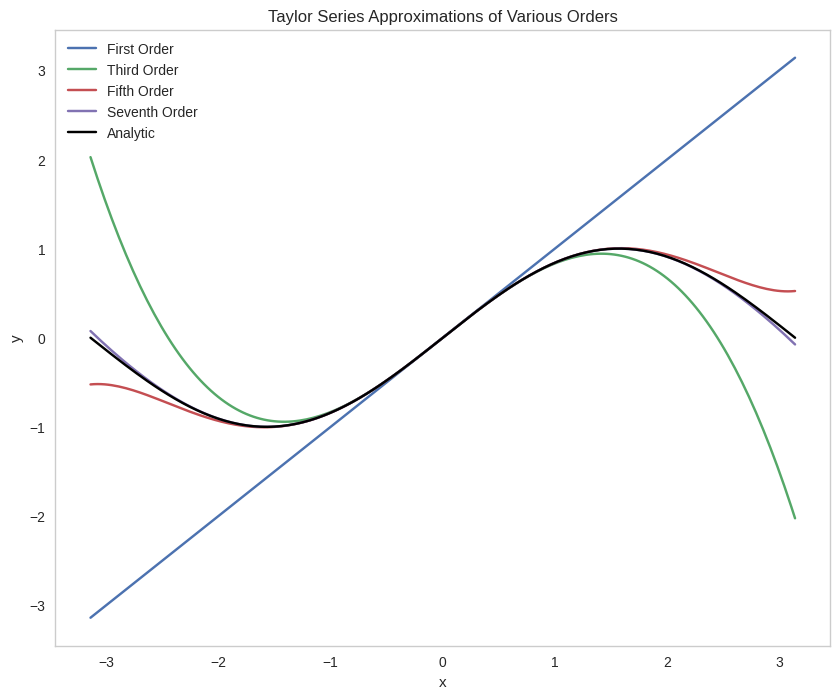

In [14]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

x = np.linspace(-np.pi, np.pi, 200)
y = np.zeros(len(x))

labels = ['First Order', 'Third Order', 'Fifth Order', 'Seventh Order']

plt.figure(figsize = (10,8))
for n, label in zip(range(4), labels):
    y = y + ((-1)**n * (x)**(2*n+1)) / np.math.factorial(2*n+1)
    plt.plot(x,y, label = label)

plt.plot(x, np.sin(x), 'k', label = 'Analytic')
plt.grid()
plt.title('Taylor Series Approximations of Various Orders')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

We will be interested in unconstrained optimization of the form:
$\displaystyle{\min_{x∈\mathbb{R}^d}f (x)}$,
where $f : \mathbb{R}^d → \mathbb{R}$.

**Definition**: Let $f : \mathbb{R}^d → \mathbb{R}$. The point $x^∗∈\mathbb{R}^d$ is a *global minimizer* of $f$ over $\mathbb{R}^d$ if
$f (x) ≥ f (x^∗), ∀x ∈ \mathbb{R}^d$.

**Definition**: Let $f : \mathbb{R}^d → \mathbb{R}$. The point x∗ ∈ Rd is a *local minimizer* of $f$ over $\mathbb{R}^d$ if there is a $δ > 0$ such that $f (x) ≥ f (x^∗), ∀x ∈ B
δ (x^∗) \backslash {x^∗}$.

Gradient descent is an iterative optimization algorithm for finding a local minimum of a differentiable function. Once we know a function has a minimizer, we will discuss a class of algorithms known as gradient descent method for solving optimization problems numerically. Let  $f : \mathbb{R}^d → \mathbb{R}$ be continuously differentiable. We restrict ourselves to unconstrained minimization problems
of the form $\displaystyle{\min_{x∈\mathbb{R}^d}f (x)}$.
One might evaluate $f$ at a large number of points $x$ to identify a global minimizer of $f$ . This naive approach seems too expensive. A less naive approach might be to find all stationary points of $f$ , that is, those $x$'s such that $∇ f (x) = 0$. And then choose that $x$ among them that produces the smallest value of $f (x)$. This indeed works in many problems.

Consider the following example where a gradient descent is used to find a local minimum, [source](https://www.geeksforgeeks.org/how-to-implement-a-gradient-descent-in-python-to-find-a-local-minimum/)

Iteration 1: Cost 4352.088931274409, Weight 		0.7593291142562117, Bias 0.02288558130709
Iteration 2: Cost 1114.8561474350017, Weight 		1.081602958862324, Bias 0.02918014748569513
Iteration 3: Cost 341.42912086804455, Weight 		1.2391274084945083, Bias 0.03225308846928192
Iteration 4: Cost 156.64495290904443, Weight 		1.3161239281746984, Bias 0.03375132986012604
Iteration 5: Cost 112.49704004742098, Weight 		1.3537591652024805, Bias 0.034479873154934775
Iteration 6: Cost 101.9493925395456, Weight 		1.3721549833978113, Bias 0.034832195392868505
Iteration 7: Cost 99.4293893333546, Weight 		1.3811467575154601, Bias 0.03500062439068245
Iteration 8: Cost 98.82731958262897, Weight 		1.3855419247507244, Bias 0.03507916814736111
Iteration 9: Cost 98.68347500997261, Weight 		1.3876903144657764, Bias 0.035113776874486774
Iteration 10: Cost 98.64910780902792, Weight 		1.3887405007983562, Bias 0.035126910596389935
Iteration 11: Cost 98.64089651459352, Weight 		1.389253895811451, Bias 0.0351295475583

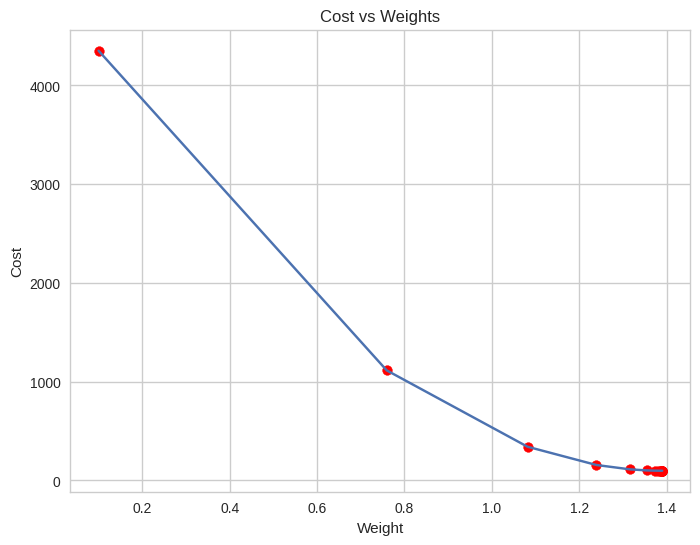

Estimated Weight: 1.389738813163012
Estimated Bias: 0.03509461674147458


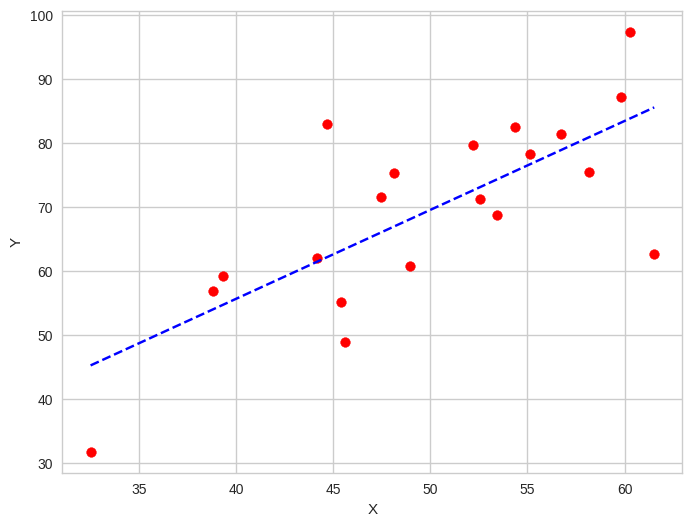

In [13]:
# Importing Libraries
import numpy as np
import matplotlib.pyplot as plt

def mean_squared_error(y_true, y_predicted):

	# Calculating the loss or cost
	cost = np.sum((y_true-y_predicted)**2) / len(y_true)
	return cost

# Gradient Descent Function
# Here iterations, learning_rate, stopping_threshold
# are hyperparameters that can be tuned
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001,
					stopping_threshold = 1e-6):

	# Initializing weight, bias, learning rate and iterations
	current_weight = 0.1
	current_bias = 0.01
	iterations = iterations
	learning_rate = learning_rate
	n = float(len(x))

	costs = []
	weights = []
	previous_cost = None

	# Estimation of optimal parameters
	for i in range(iterations):

		# Making predictions
		y_predicted = (current_weight * x) + current_bias

		# Calculating the current cost
		current_cost = mean_squared_error(y, y_predicted)

		# If the change in cost is less than or equal to
		# stopping_threshold we stop the gradient descent
		if previous_cost and abs(previous_cost-current_cost)<=stopping_threshold:
			break

		previous_cost = current_cost

		costs.append(current_cost)
		weights.append(current_weight)

		# Calculating the gradients
		weight_derivative = -(2/n) * sum(x * (y-y_predicted))
		bias_derivative = -(2/n) * sum(y-y_predicted)

		# Updating weights and bias
		current_weight = current_weight - (learning_rate * weight_derivative)
		current_bias = current_bias - (learning_rate * bias_derivative)

		# Printing the parameters for each 1000th iteration
		print(f"Iteration {i+1}: Cost {current_cost}, Weight \
		{current_weight}, Bias {current_bias}")


	# Visualizing the weights and cost at for all iterations
	plt.figure(figsize = (8,6))
	plt.plot(weights, costs)
	plt.scatter(weights, costs, marker='o', color='red')
	plt.title("Cost vs Weights")
	plt.ylabel("Cost")
	plt.xlabel("Weight")
	plt.show()

	return current_weight, current_bias


def main():

	# Data
	X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
		55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
		45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
		48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
	Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
		78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
		55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
		60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

	# Estimating weight and bias using gradient descent
	estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
	print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

	# Making predictions using estimated parameters
	Y_pred = estimated_weight*X + estimated_bias

	# Plotting the regression line
	plt.figure(figsize = (8,6))
	plt.scatter(X, Y, marker='o', color='red')
	plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
			markersize=10,linestyle='dashed')
	plt.xlabel("X")
	plt.ylabel("Y")
	plt.show()


if __name__=="__main__":
	main()
